## About the Data

1. Name / Title: Nutrition Facts for McDonald's Menu
2. Link to Data: https://www.kaggle.com/mcdonalds/nutrition-facts
3. Source / Origin: 
	* Author or Creator: McDonald's 
	* Publication Date: 2017-03-03
	* Publisher: Kaggle
	* Version or Data Accessed: 2022-02-24
4. License: Unknown
5. Can You Use this Data Set for Your Intended Use Case? Yes

## Format and Samples

### Overview

Format: csv
Size: 32kb
Number of Records: 262

### Sample of Data

In [212]:
import csv
with open('../data/raw/menu.csv', 'r') as f:
  head = [next(f) for x in range(3)]
print(head)

['Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)\n', 'Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13,20,5,25,0,260,87,750,31,31,10,4,17,3,17,10,0,25,15\n', 'Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8,12,3,15,0,25,8,770,32,30,10,4,17,3,18,6,0,25,8\n']


### Fields or Column Headers

* Field/Column 1: Category
* Field/Column 2: Item
* Field/Column 3: Serving Size
* Field/Column 4: Calories
* Field/Column 5: Calories from fat
* Field/Column 6: Total fat
* Field/Column 7: Total fat(% Daily Value)
* Field/Column 8: Saturated Fat
* Field/Column 9: Saturated Fat (% Daily Value)
* Field/Column 10: Trans Fat
* Field/Column 11: Cholesterol
* Field/Column 12: Cholesterol (% Daily Value)
* Field/Column 13: Sodium
* Field/Column 14: Sodium (% Daily Value)
* Field/Column 15: Carbohydrates
* Field/Column 16: Carbohydrates (% Daily Value)
* Field/Column 17: Dietary Fiber
* Field/Column 18: Dietary Fiber (% Daily Value
* Field/Column 19: Sugars
* Field/Column 20: Protein
* Field/Column 21: Vitamin A %
* Field/Column 22: Vit C %
* Field/Column 23: Calcium %
* Field/Column 24: Iron %

In [213]:
import pandas as pd
df = pd.read_csv("../data/raw/menu.csv")
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


* I want to clean up duplicate columns (for instance I'm only interested in nutrition percentages of daily value and total calories, and I'll consider everything else redundant)
* I want to find the highest calorie items on the menu and the lowest calorie items
* I want to find the number of breakfast items, regular menu items, dessert, and beverages
* Perhaps examine correlation between serving size and calories -- find the most calorie dense menu item?

In [214]:
#1 type conversion DONE
#1 transform a column DONE
#1 create a new calculated column DONE
#1 visualization DONE X3
#1 calculate summary statistics DONE
#1 calculate value counts DONE

df.columns.values

array(['Category', 'Item', 'Serving Size', 'Calories',
       'Calories from Fat', 'Total Fat', 'Total Fat (% Daily Value)',
       'Saturated Fat', 'Saturated Fat (% Daily Value)', 'Trans Fat',
       'Cholesterol', 'Cholesterol (% Daily Value)', 'Sodium',
       'Sodium (% Daily Value)', 'Carbohydrates',
       'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'], dtype=object)

In [215]:
df=df.drop(['Calories from Fat', 'Total Fat (% Daily Value)', 'Saturated Fat (% Daily Value)', 
            'Cholesterol (% Daily Value)', 'Sodium (% Daily Value)', 'Carbohydrates (% Daily Value)',
           'Dietary Fiber (% Daily Value)'], axis=1)

In [216]:
#calculating VALUE COUNTS
df['Category'].value_counts()

Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Chicken & Fish        27
Beverages             27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: Category, dtype: int64

In [230]:
#transform serving size to grams only, int type
#we have to select for solid food only because liquids are measured in fl oz
pd.options.mode.chained_assignment = None  # default='warn'

solids = df.loc[(df['Category'] !='Coffee & Tea') & 
              (df['Category'] != 'Smoothies & Shakes') & (df['Category'] != 'Beverages')] 

s=[]
for size in solids['Serving Size']:
    s.append((size.split('(')[1])[:3])
    
#CREATE A NEW CALCULATED COLUMN
solids.insert(2, "Serving Size (g)", s, True)

#TYPE CONVERSION
solids['Serving Size (g)'] = solids['Serving Size (g)'].astype(int)
solids.head(5)

,Category,Item,Serving Size (g),Serving Size,Calories,Total Fat,Saturated Fat,Trans Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,136,4.8 oz (136 g),300,13.0,5.0,0.0,260,750,31,4,3,17,10,0,25,15
1,Breakfast,Egg White Delight,135,4.8 oz (135 g),250,8.0,3.0,0.0,25,770,30,4,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,111,3.9 oz (111 g),370,23.0,8.0,0.0,45,780,29,4,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,161,5.7 oz (161 g),450,28.0,10.0,0.0,285,860,30,4,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,161,5.7 oz (161 g),400,23.0,8.0,0.0,50,880,30,4,2,21,6,0,25,10


In [218]:
#CALCULATE SUMMARY STATISTICS FOR CALORIE COUNT
df['Calories'].describe()

count     260.000000
mean      368.269231
std       240.269886
min         0.000000
25%       210.000000
50%       340.000000
75%       500.000000
max      1880.000000
Name: Calories, dtype: float64

<AxesSubplot:xlabel='Calories', ylabel='Total Fat'>

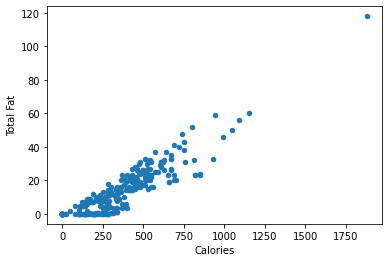

In [219]:
#VISUALIZATION
#This graph illustrates the relationship between amt of calories and fat 
import matplotlib.pyplot as plt

df.plot.scatter(x='Calories', y='Total Fat')

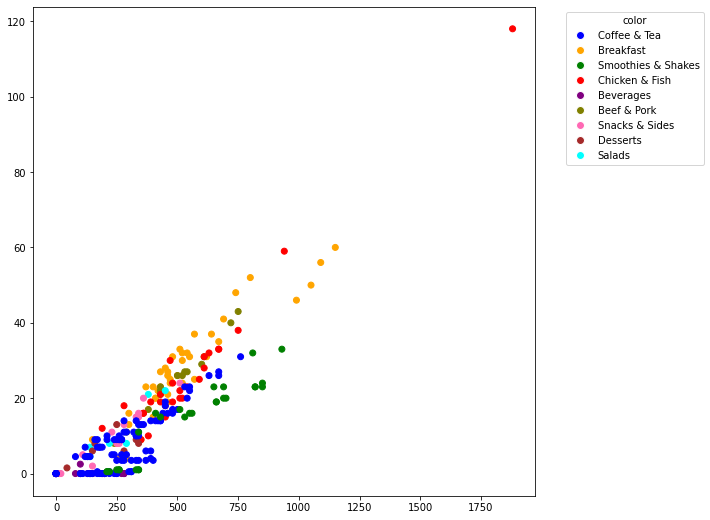

In [231]:
#VISUALIZATION
#improved verison of previous visualization, with colors based on menu category and a legend
from matplotlib.lines import Line2D 

fig, ax = plt.subplots(figsize=(9, 9))

colors = {'Coffee & Tea':'blue', 'Breakfast':'orange', 'Smoothies & Shakes':'green', 
          'Chicken & Fish':'red', 'Beverages':'purple', 'Beef & Pork':'olive',
         'Snacks & Sides':'teal', 'Snacks & Sides':'hotpink', 'Desserts':'brown', 'Salads':'cyan'}

ax.scatter(df['Calories'], df['Total Fat'], c=df['Category'].map(colors))

# add a legend
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]
ax.legend(title='color', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

<AxesSubplot:xlabel='Serving Size (g)', ylabel='Calories'>

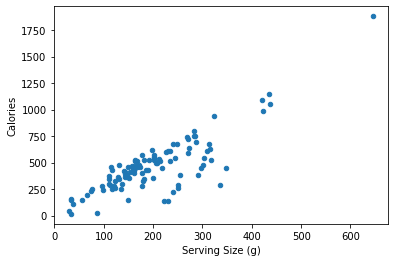

In [229]:
#VISUALIZATION
#Illustrating relationship between serving size in grams, and calories (calorie density)
solids=solids.sort_values(by='Serving Size (g)')
solids.plot(kind='scatter', x='Serving Size (g)', y='Calories')